In [2]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout

num_classes = 10
im_rows = 32
im_cols =32
im_size = im_rows * im_cols * 3

# データ読み込み
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# データを一次元配列に変換（ついでにfloatに）
X_train = X_train.reshape(-1, im_size).astype('float32') / 255
X_test = X_test.reshape(-1, im_size).astype('float32') / 255
# ラベルデータをOne-Hot形式に変換　ベクトル→0-9に
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# モデル定義
model = Sequential()
# 入力の次元数　Dense(10,活性化関数,input_shape=入力次元数)：ユニットが１０あるネットワーク作成
model.add(Dense(512, activation = 'relu', input_shape = (im_size,)))
model.add(Dense(num_classes, activation = 'softmax'))

# モデルコンパイル
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 学習を実行
hist = model.fit(X_train, y_train, batch_size = 32, epochs = 5, verbose = 1, validation_data = (X_test, y_test))

# モデル評価
score = model.evaluate(X_test, y_test, verbose = 1)
print ( '正解率：', score[1], 'loss：', score[0])

# 学習の様子をグラフへ描画
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train','test'], loc = 'upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

/Users/yuki-t/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/yuki-t/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


Train on 50000 samples, validate on 10000 samples
Epoch 1/5
49984/50000 [============================>.] - ETA: 0s - loss: 1.9082 - acc: 0.3326

KeyboardInterrupt: 

In [3]:
# モデル読み込み
model.save_weights('cifar10-mlp-weight.h5')

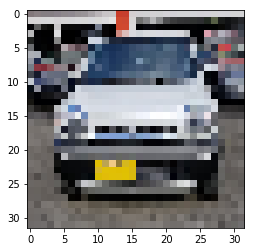

1/1 [==============================] - 0s 12ms/step
airplane = 1
automobile = 74
bird = 0
cat = 0
deer = 0
dog = 0
frog = 0
horse = 0
ship = 2
truck = 20
---
予測した結果： automobile


In [9]:
import cv2
import numpy as np 

labels = ["airplane","automobile", "bird", "cat", "deer", "dog","frog","horse","ship","truck"]
im_size = 32 * 32 * 3

# モデル読み込み
model.load_weights('cifar10-mlp-weight.h5')

# OpenCVを使って画像を読み込む
im = cv2.imread('test-car.jpg')

# 色空間を変換してリサイズ
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (32,32))
plt.imshow(im)
plt.show()

# MLPで学習した画像データに合わせる
im = im.reshape(im_size).astype('float32') / 255
# 予測
r = model.predict(np.array([im]),batch_size=32, verbose=1)
res = r[0]
# 結果表示
for i, acc in enumerate(res) :
    print(labels[i], "=", int (acc * 100))
    
print("---")
print("予測した結果：",labels[res.argmax()])